In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import os

In [8]:
app_train = pd.read_csv("../csv-data/application_train.csv")

<AxesSubplot:ylabel='Frequency'>

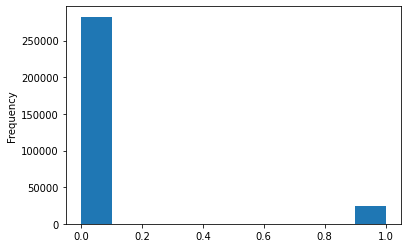

In [4]:
app_train['TARGET'].value_counts()
app_train['TARGET'].astype(int).plot.hist()

In [5]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## 2種類の文字列で表されている列に関してone-hot表現に変換

In [6]:
le = LabelEncoder()
le_count = 0

for col in app_train:  # pandas.DataFrameをそのままforループに入れるとカラム名が順に取り出される
    # print(col)
    if app_train[col].dtype == 'object':  # app_train[col]でその列の値を取得できる, str型のみ
        # print(app_train[col])
        # print(f"----------------------------{len(app_train[col].unique())}")
        if len(list(app_train[col].unique())) <= 2:  # unique()で圧縮, set型と同じような処理, 結果はnumpy.ndarray型でlistにキャストしなくてもlenを適用できる
            print(app_train[col].unique())
            le.fit(app_train[col])  # ラベルとラベルIDの対応づけ, e.g.['Cash loans' 'Revolving loans']と[0 1]の対応
            app_train[col] = le.transform(app_train[col])  # ラベル->ラベルIDの変換
            print(app_train[col].unique())
            le_count += 1

print('%d columns were label encoded.' % le_count)

['Cash loans' 'Revolving loans']
[0 1]
['N' 'Y']
[0 1]
['Y' 'N']
[1 0]
3 columns were label encoded.


In [14]:
unique_count = app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)
print(type(unique_count))
print(unique_count)
print(unique_count.index)
print(unique_count['NAME_CONTRACT_TYPE'])

<class 'pandas.core.series.Series'>
NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
2


In [38]:
def display_categorical_features(df, thresh=10):
    results = pd.DataFrame(columns=['column_name', 'n_variation', 'values'])
    unique_count = df.select_dtypes('object').apply(pd.Series.nunique, axis=0)
    for idx in unique_count.index:
        if unique_count[idx] <= thresh:
            # print(f"{idx}\t{unique_count[idx]}\t{df[idx].unique()}")
            result = pd.Series([idx, unique_count[idx], df[idx].unique()], index=results.columns)
            results = results.append(result, ignore_index=True)
        else:
            result = pd.Series([idx, unique_count[idx], None], index=results.columns)
            results = results.append(result, ignore_index=True)
            # results = results.append([idx, unique_count[idx], df[idx].unique()])
    results = results.sort_values('n_variation')
    print(results[:][1:])
    results.to_csv("categorical-features.csv")

display_categorical_features(app_train)

                   column_name n_variation  \
2                 FLAG_OWN_CAR           2   
3              FLAG_OWN_REALTY           2   
15         EMERGENCYSTATE_MODE           2   
1                  CODE_GENDER           3   
13              HOUSETYPE_MODE           3   
12          FONDKAPREMONT_MODE           4   
6          NAME_EDUCATION_TYPE           5   
7           NAME_FAMILY_STATUS           6   
8            NAME_HOUSING_TYPE           6   
4              NAME_TYPE_SUITE           7   
10  WEEKDAY_APPR_PROCESS_START           7   
14          WALLSMATERIAL_MODE           7   
5             NAME_INCOME_TYPE           8   
9              OCCUPATION_TYPE          18   
11           ORGANIZATION_TYPE          58   

                                               values  
2                                              [N, Y]  
3                                              [Y, N]  
15                                     [No, nan, Yes]  
1                                      